In [343]:
import pandas as pd
import numpy as ny
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

!pip install squarify
import squarify

In [334]:
#load data retail and print first rows
retail = pd.read_excel("C:\\Users\\Nga\\Downloads\\Final_project_RFM\\ecommerce retail.xlsx")
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [40]:
#check null values in each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [45]:
#remove rows where customerID is null

retail = retail.dropna(subset=['CustomerID'], axis = 0)
print(retail.shape)

(406829, 8)


In [47]:
#remove duplicate rows
retail = retail.drop_duplicates()
print(retail.shape)

(401604, 8)


In [52]:
#remove rows where Quantity < 0
retail = retail[(retail['Quantity'] >= 0)]
print(retail1.shape)

(392732, 8)


In [62]:
#convert some columns to correct data type
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail['InvoiceNo'] = retail['InvoiceNo'].astype(int)

retail


InvoiceNo StockCode                          Description  Quantity  \
0          536365     85123   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365       NaN                  WHITE METAL LANTERN         6   
2          536365     84406       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587       NaN          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587       NaN         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587       NaN        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587       NaN      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587       NaN        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85       12680          France  
541905 2011-12-09 12:50:00       2.10       12680          France  
541906 2011-12-09 12:50:00       4.15       12680          France  
541907 2011-12-09 12:50:00       4.15       12680          France  
541908 2011-12-09 12:50:00       4.95       12680          France  

[392732 rows x 8 columns]

In [63]:
retail.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID
count  392732.000000  392732.000000  392732.000000  392732.000000
mean   560591.072436      13.153718       3.125596   15287.734822
std     13087.116747     181.588420      22.240725    1713.567773
min    536365.000000       1.000000       0.000000   12346.000000
25%    549234.000000       2.000000       1.250000   13955.000000
50%    561874.000000       6.000000       1.950000   15150.000000
75%    572061.000000      12.000000       3.750000   16791.000000
max    581587.000000   80995.000000    8142.750000   18287.000000

In [77]:
#calculate quantity of unique invoice of each Customer to calculate Frequency
f = retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
f.columns = ['CustomerID', 'Frequency']
f

CustomerID  Frequency
0          12346          1
1          12347          7
2          12348          4
3          12349          1
4          12350          1
...          ...        ...
4334       18280          1
4335       18281          1
4336       18282          2
4337       18283         16
4338       18287          3

[4339 rows x 2 columns]

In [84]:
#calculate Revenue of each invoice to calculate Monetary
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']
m = retail.groupby('CustomerID').agg({'Revenue':'sum'}).reset_index()
m.columns = ['CustomerID','Monetary']
m

CustomerID  Monetary
0          12346  77183.60
1          12347   4310.00
2          12348   1797.24
3          12349   1757.55
4          12350    334.40
...          ...       ...
4334       18280    180.60
4335       18281     80.82
4336       18282    178.05
4337       18283   2045.53
4338       18287   1837.28

[4339 rows x 2 columns]

In [88]:
#set set_date is 31/12/2011 to calculate Recency
set_date = pd.Timestamp("2011-12-31")
set_date

Timestamp('2011-12-31 00:00:00')

In [87]:
#filter last purchase of each customer to calculate Recency
r = retail.groupby('CustomerID').agg({'InvoiceDate':'max'}).reset_index()
r.columns = ['CustomerID','LastPurchase']
r

CustomerID        LastPurchase
0          12346 2011-01-18 10:01:00
1          12347 2011-12-07 15:52:00
2          12348 2011-09-25 13:13:00
3          12349 2011-11-21 09:51:00
4          12350 2011-02-02 16:01:00
...          ...                 ...
4334       18280 2011-03-07 09:52:00
4335       18281 2011-06-12 10:53:00
4336       18282 2011-12-02 11:43:00
4337       18283 2011-12-06 12:02:00
4338       18287 2011-10-28 09:29:00

[4339 rows x 2 columns]

In [96]:
#calculate Recency = set_date - LastPurchase; only keep day number, remove 'days' and hour,minute, second
r['Recency'] = (set_date - r['LastPurchase']).dt.days
r

CustomerID        LastPurchase  Recency
0          12346 2011-01-18 10:01:00      346
1          12347 2011-12-07 15:52:00       23
2          12348 2011-09-25 13:13:00       96
3          12349 2011-11-21 09:51:00       39
4          12350 2011-02-02 16:01:00      331
...          ...                 ...      ...
4334       18280 2011-03-07 09:52:00      298
4335       18281 2011-06-12 10:53:00      201
4336       18282 2011-12-02 11:43:00       28
4337       18283 2011-12-06 12:02:00       24
4338       18287 2011-10-28 09:29:00       63

[4339 rows x 3 columns]

In [97]:
#remove LastPurchase column
r = r.drop('LastPurchase', axis = 1)
r

CustomerID  Recency
0          12346      346
1          12347       23
2          12348       96
3          12349       39
4          12350      331
...          ...      ...
4334       18280      298
4335       18281      201
4336       18282       28
4337       18283       24
4338       18287       63

[4339 rows x 2 columns]

In [101]:
#join r,f,m tables to summarize RFM Score
rfm = r.merge(f,on='CustomerID').merge(m,on='CustomerID')
rfm

CustomerID  Recency  Frequency  Monetary
0          12346      346          1  77183.60
1          12347       23          7   4310.00
2          12348       96          4   1797.24
3          12349       39          1   1757.55
4          12350      331          1    334.40
...          ...      ...        ...       ...
4334       18280      298          1    180.60
4335       18281      201          1     80.82
4336       18282       28          2    178.05
4337       18283       24         16   2045.53
4338       18287       63          3   1837.28

[4339 rows x 4 columns]

In [182]:
#base on quintiles, create R Score (min = 5, max = 1), F Score (min = 1, max = 5), M Score (min = 1, max = 5) Column
#by ranking 1-5
rfm['R Score'] = pd.qcut(rfm['Recency'], q=5, labels=range(5,0,-1))
rfm['F Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=range(1,6,1))
rfm['M Score'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1,6,1))

#group R,F,M Score to create RFM score
rfm['RFM Score'] = rfm['R Score'].astype(str) + rfm['F Score'].astype(str) + rfm['M Score'].astype(str)

#convert RFM score to datatype int
rfm['RFM Score'] = rfm['RFM Score'].astype(int)
rfm

CustomerID  Recency  Frequency   Monetary R Score M Score F Score  \
4202       18102       21         60  259657.30       5       5       5   
2177       15311       21         91   60632.75       5       5       5   
326        12748       21        210   33053.19       5       5       5   
1880       14911       22        201  143711.17       5       5       5   
1690       14646       22         74  280206.02       5       5       5   
...          ...      ...        ...        ...     ...     ...     ...   
508        13011      393          1      50.55       1       1       2   
1651       14589      392          1      39.75       1       1       2   
402        12855      393          1      38.10       1       1       2   
1641       14576      393          1      35.40       1       1       2   
2559       15823      393          1      15.00       1       1       2   

      RFM Score  
4202        555  
2177        555  
326         555  
1880        555  
1690        555  
...         ...  
508         121  
1651        121  
402         121  
1641        121  
2559        121  

[4339 rows x 8 columns]

In [196]:
#load data segment
segment = pd.read_excel("C:\\Users\\Nga\\Downloads\\Final_project\\Final_project_RFM\\ecommerce_retail.xlsx")
segment

Segment                                          RFM Score
0               Champions                  555, 554, 544, 545, 454, 455, 445
1                   Loyal             543, 444, 435, 355, 354, 345, 344, 335
2      Potential Loyalist  553, 551, 552, 541, 542, 533, 532, 531, 452, 4...
3           New Customers                  512, 511, 422, 421, 412, 411, 311
4               Promising  525, 524, 523, 522, 521, 515, 514, 513, 425,42...
5          Need Attention             535, 534, 443, 434, 343, 334, 325, 324
6          About To Sleep             331, 321, 312, 221, 213, 231, 241, 251
7                 At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...
8        Cannot Lose Them               155, 154, 144, 214,215,115, 114, 113
9   Hibernating customers  332, 322, 233, 232, 223, 222, 132, 123, 122, 2...
10         Lost customers                         111, 112, 121, 131,141,151

In [197]:
#convert RFM Score datatype from series to str
segment['RFM Score'] = segment['RFM Score'].astype(str)

#divide data segment into seperated RFM Score rows, using split
segment['RFM Score'] = segment['RFM Score'].str.split(', ')
segment = segment.explode('RFM Score')
segment['RFM Score'] = segment['RFM Score'].str.split(',')
segment = segment.explode('RFM Score')

segment

Segment RFM Score
0        Champions       555
0        Champions       554
0        Champions       544
0        Champions       545
0        Champions       454
..             ...       ...
10  Lost customers       112
10  Lost customers       121
10  Lost customers       131
10  Lost customers       141
10  Lost customers       151

[125 rows x 2 columns]

In [274]:
#join segment and rfm dataframe
seg = rfm.merge(segment, on='RFM Score')
seg

CustomerID  Recency  Frequency   Monetary R Score M Score F Score  \
0          18102       21         60  259657.30       5       5       5   
1          15311       21         91   60632.75       5       5       5   
2          12748       21        210   33053.19       5       5       5   
3          14911       22        201  143711.17       5       5       5   
4          14646       22         74  280206.02       5       5       5   
...          ...      ...        ...        ...     ...     ...     ...   
4334       13011      393          1      50.55       1       1       2   
4335       14589      392          1      39.75       1       1       2   
4336       12855      393          1      38.10       1       1       2   
4337       14576      393          1      35.40       1       1       2   
4338       15823      393          1      15.00       1       1       2   

     RFM Score         Segment  
0          555       Champions  
1          555       Champions  
2          555       Champions  
3          555       Champions  
4          555       Champions  
...        ...             ...  
4334       121  Lost customers  
4335       121  Lost customers  
4336       121  Lost customers  
4337       121  Lost customers  
4338       121  Lost customers  

[4339 rows x 9 columns]

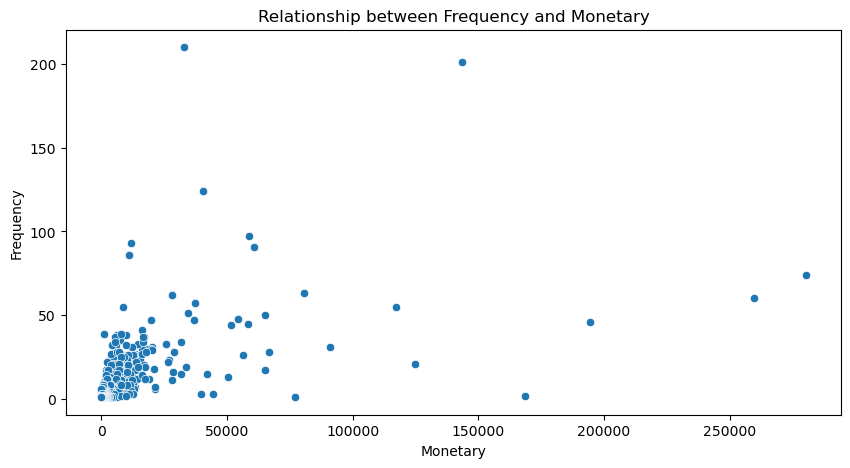

In [280]:
#visualization of Relationship between Frequency and Monetary, using scatter plot
#set the figure size
plt.figure(figsize=(10, 5))

sns.scatterplot(data=seg, x='Monetary', y ='Frequency')
plt.title('Relationship between Frequency and Monetary')

plt.show()

-> The more frequently customers buy, the higher the value of the invoice is.

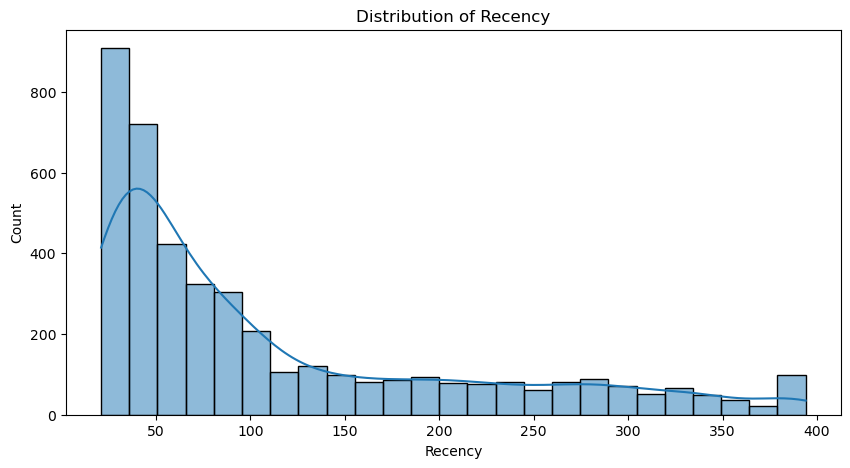

In [284]:
#visualization of Distribution of Recency, using histogram plot
#set the figure size
plt.figure(figsize=(10, 5))

sns.histplot(data=seg, x='Recency', kde=True)

#set title
plt.title('Distribution of Recency')

plt.show()

The recency < 50 having the largest distribution -> a significant portion of customers have recently made orders.

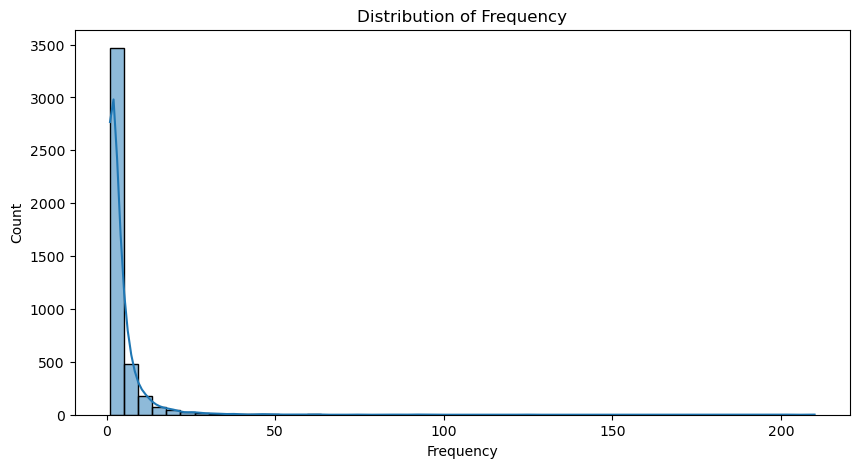

In [286]:
#visualization of Distribution of Frequency, using histogram plot
#set the figure size
plt.figure(figsize=(10, 5))

sns.histplot(data=seg, x='Frequency', kde=True, bins=50)

#set title
plt.title('Distribution of Frequency')

plt.show()

Frequency = 1 is majority => a significant portion of customers made only a single purchase.

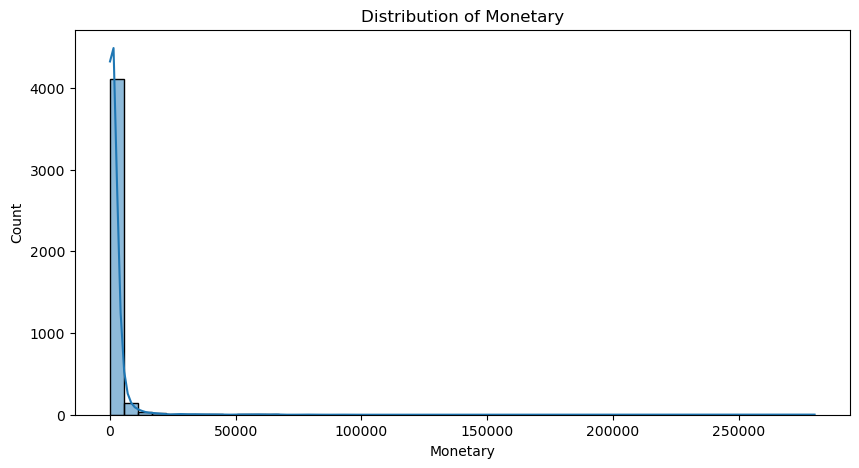

In [291]:
#visualization of Distribution of Monetary, using histogram plot
#set the figure size
plt.figure(figsize=(10,5))

sns.histplot(data=seg, x='Monetary', kde=True, bins=50)

#set title and axis labels
plt.title('Distribution of Monetary')

plt.show()

Monetary < 5000 being the majority => a significant portion of customers spent relatively small amounts, tended to make lower-value purchases.

In [383]:
#calculate Number of Customers, average time since last order, average time between transactions, average transactions value

grouped_seg = seg.groupby('Segment').agg(
            {'CustomerID':'count', 'Recency':'mean', 'Frequency':'sum', 'Monetary':'mean'}).reset_index()
grouped_seg.columns = ['Segment','Number of Customers','Avg Time since last order', 'Total Invoice',
                       'Avg transactions value']

grouped_seg

Segment  Number of Customers  Avg Time since last order  \
0          About To Sleep                  350                 119.097143   
1                 At Risk                  471                 166.095541   
2        Cannot Lose Them                  132                 249.386364   
3               Champions                  823                  31.829891   
4   Hibernating customers                  560                 198.205357   
5          Lost customers                  399                 292.977444   
6                   Loyal                  372                  58.362903   
7          Need Attention                  283                  56.427562   
8           New Customers                  345                  51.255072   
9      Potential Loyalist                  380                  48.542105   
10              Promising                  224                  43.549107   

    Total Invoice  Avg transactions value  
0             424              298.240943  
1            1746             1608.190790  
2             259             1887.086970  
3           10084             6743.558906  
4             817              393.117823  
5             431              174.224110  
6            2112             2564.450000  
7             917             1165.789085  
8             360              212.820580  
9            1032              551.215947  
10            354             1651.258795

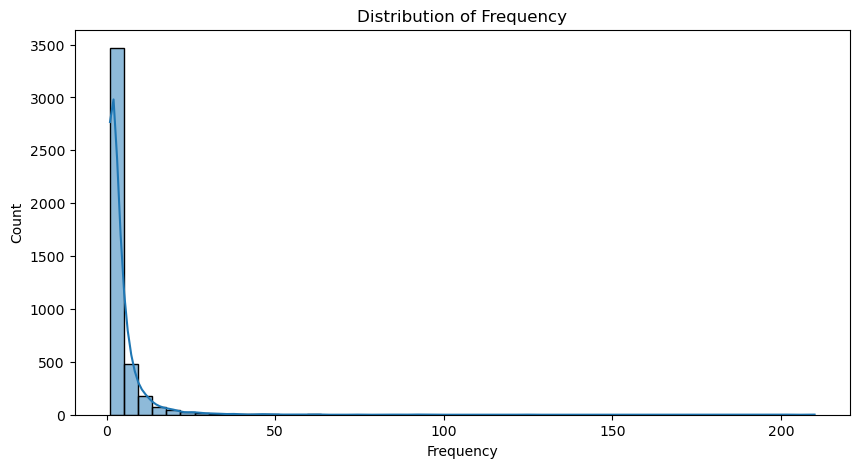

In [364]:
#visualization using histogram plot
#set the figure size
plt.figure(figsize=(10, 5))

sns.histplot(data=seg, x='Frequency', kde=True, bins=50)

#set title
plt.title('Distribution of Frequency')

plt.show()


The majority of customers are in the Champions segment, who buy the most recently and the most often, with highest average of transactions value.

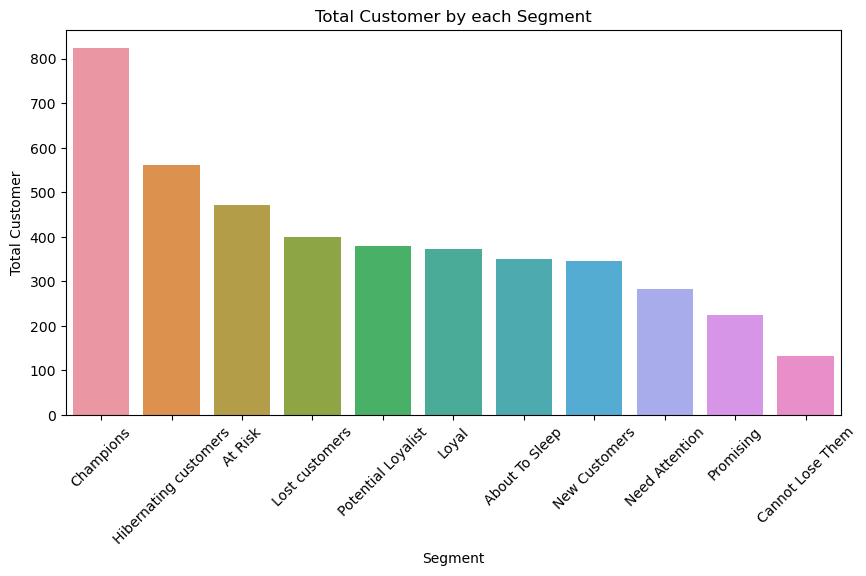

In [308]:
#visualization of Total Customer by each Segment, using count plot
#set figure size
plt.figure(figsize=(10, 5))

#Order by count value
segment_order = seg['Segment'].value_counts().index
sns.countplot(data=seg, x='Segment', order=segment_order)
plt.title('Total Customer by each Segment')
plt.ylabel('Total Customer')

#rotate x label
plt.xticks(rotation=45)

plt.show()

In [384]:
#Calculate %Total customer, %Avg Time since last order, %Avg time between transactions, %Avg revenue each Segment
grouped_seg['%Total customer'] = grouped_seg['Number of Customers']*100/grouped_seg['Number of Customers'].sum()
grouped_seg['%Avg Time since last order'] = grouped_seg['Avg Time since last order']*100/grouped_seg['Avg Time since last order'].sum()
grouped_seg['%Total Invoice'] = grouped_seg['Total Invoice']*100/grouped_seg['Total Invoice'].sum()
grouped_seg['%Revenue'] = grouped_seg['Avg transactions value']*100/grouped_seg['Avg transactions value'].sum()

#Remove Avg Time since last order and Avg transactions value columns
grouped_seg = grouped_seg.drop('Avg Time since last order', axis=1)
grouped_seg = grouped_seg.drop('Total Invoice', axis=1)

grouped_seg

Segment  Number of Customers  Avg transactions value  \
0          About To Sleep                  350              298.240943   
1                 At Risk                  471             1608.190790   
2        Cannot Lose Them                  132             1887.086970   
3               Champions                  823             6743.558906   
4   Hibernating customers                  560              393.117823   
5          Lost customers                  399              174.224110   
6                   Loyal                  372             2564.450000   
7          Need Attention                  283             1165.789085   
8           New Customers                  345              212.820580   
9      Potential Loyalist                  380              551.215947   
10              Promising                  224             1651.258795   

    %Total customer  %Avg Time since last order  %Total Invoice   %Revenue  
0          8.066375                    9.051802        2.287441   1.728938  
1         10.855036                   12.623846        9.419508   9.322870  
2          3.042176                   18.954242        1.397281  10.939664  
3         18.967504                    2.419184       54.402244  39.093199  
4         12.906200                   15.064305        4.407639   2.278950  
5          9.195667                   22.267318        2.325205   1.009998  
6          8.573404                    4.435786       11.394044  14.866416  
7          6.522240                    4.288693        4.947130   6.758216  
8          7.951141                    3.895566        1.942167   1.233746  
9          8.757778                    3.689371        5.567544   3.195463  
10         5.162480                    3.309886        1.909797   9.572540

In [385]:
#Sort by Number of Customers
grouped_seg = grouped_seg.sort_values(by='Number of Customers', ascending=False)
grouped_seg

Segment  Number of Customers  Avg transactions value  \
3               Champions                  823             6743.558906   
4   Hibernating customers                  560              393.117823   
1                 At Risk                  471             1608.190790   
5          Lost customers                  399              174.224110   
9      Potential Loyalist                  380              551.215947   
6                   Loyal                  372             2564.450000   
0          About To Sleep                  350              298.240943   
8           New Customers                  345              212.820580   
7          Need Attention                  283             1165.789085   
10              Promising                  224             1651.258795   
2        Cannot Lose Them                  132             1887.086970   

    %Total customer  %Avg Time since last order  %Total Invoice   %Revenue  
3         18.967504                    2.419184       54.402244  39.093199  
4         12.906200                   15.064305        4.407639   2.278950  
1         10.855036                   12.623846        9.419508   9.322870  
5          9.195667                   22.267318        2.325205   1.009998  
9          8.757778                    3.689371        5.567544   3.195463  
6          8.573404                    4.435786       11.394044  14.866416  
0          8.066375                    9.051802        2.287441   1.728938  
8          7.951141                    3.895566        1.942167   1.233746  
7          6.522240                    4.288693        4.947130   6.758216  
10         5.162480                    3.309886        1.909797   9.572540  
2          3.042176                   18.954242        1.397281  10.939664

Insights and Recommendations:
1. Champions: 
- Champions represent a significant portion of total customer (18.97%).
- They generate the highest revenue (39.09% of total revenue).
- Champions have a relatively short time since their last order (2.42%), indicating frequent purchases.
- -> The company should continue to engage and reward Champions to maintain their loyalty. They also could offer exclusive promotions and incentives to keep them active.

2. Hibernating customers
- Hibernating Customers account for 12.91% of total customer.
- They have a low revenue contribution (2.28%).
- The time since their last order is relatively long (15.06%).
- -> The company should conduct reactivation campaigns to win back Hibernating Customers. Also offering personalized discounts or incentives to encourage them to make purchases.

3. At Risk
- At Risk customers account for 10.86% of total customer.
- They contribute a decent share of revenue (9.32%).
- The time since their last order is notable (12.62%).
- -> The company should create targeted retention strategies to prevent these customers from churning. Also offering personalized experiences and promotions to keep them engaged.

4. Lost Customers
- Lost Customers account for 9.20% of total customer.
- They contribute a small share of revenue (1.01%).
- The time since their last order is significantly long (22.27%).
- -> The company should consider targeted win-back campaigns to re-engage Lost Customers. Also offering incentives or discounts to encourage them to return.

5. Potential Loyalists 
- Potential Loyalists account for 8.76% of total customer.
- They have decent share of revenue.
- Their time between transactions is relatively short (3.69%).
- -> The company should provide Potential Loyalists with loyalty programs and personalized offers to encourage them to make more frequent purchases.

6. Loyal customers 
- Loyal customers represent 8.57% of your total customer.
- They contribute significantly to revenue (14.87%).
- Loyal customers make frequent purchases.
- -> The company should reward and retain Loyal customers with exclusive benefits. Also continuing providing excellent service to maintain their loyalty.

7. About To Sleep 
- About To Sleep customers account for 8.07% of total customer.
- They have a moderate share of revenue.
- The time since their last order is notable (9.05%).
- -> The company should implement re-engagement strategies to prevent them from becoming inactive. Also sending reminder emails or promotions to encourage repeat purchases.

8. New Customers 
- New Customers make up 7.95% of total customer.
- They contribute a small share of revenue (1.23%).
- -> The company should focus on introducing new customers to your product or service. Also encouraging them to make their second purchase.

9. Need Attention 
- Need Attention customers represent 6.52% of total customer.
- They contribute a decent share of revenue (6.76%).
- The time since their last order is relatively short (4.2%).
- -> The company should provide personalized support and offers to re-engage them, and identify their needs and preferences to improve retention.

10. Promising
- Promising customers make up 5.16% of total customer.
- They contribute significantly to revenue (9.57%).
- Promising customers show potential for growth, as the time since their last order is relatively short (3.31%).
- -> The company should cultivate Promising customers into Loyal customers by offering incentives and personalized experiences to drive repeat purchases.

11. Cannot Lose Them
- Cannot Lose Them customers account for 3.04% of total customer.
- They contribute a significant share of revenue (10.94%).
- The time since their last order is relatively long (18.95%).
- -> The company should implement targeted retention strategies to prevent them from churning. Also offering exclusive benefits and incentives to retain their loyalty.

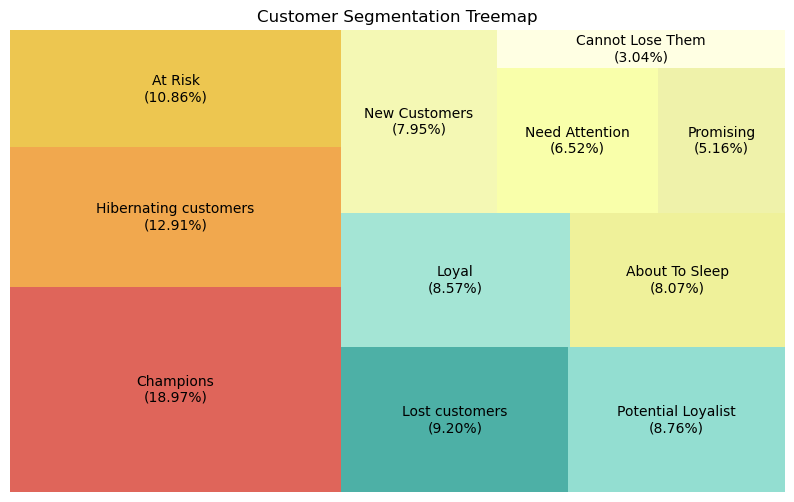

In [373]:
#visualization of %total customer for each sege, using histogram plot

#create a color palette
colors = ['#D83F31', '#EE9322', '#E9B824', '#219C90', '#78D6C6', '#8DDFCB', '#ECEE81', '#F2F7A1', '#F8FF95', '#EBEF95', '#FFFFDD']

#create a tree map
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=grouped_seg['%Total customer'],
    label=[f"{seg}\n({percentage:.2f}%)" for seg, percentage in zip(grouped_seg['Segment'], grouped_seg['%Total customer'])],
    color=colors,
    alpha=0.8)

plt.axis('off')
plt.title('Customer Segmentation Treemap')
plt.show()

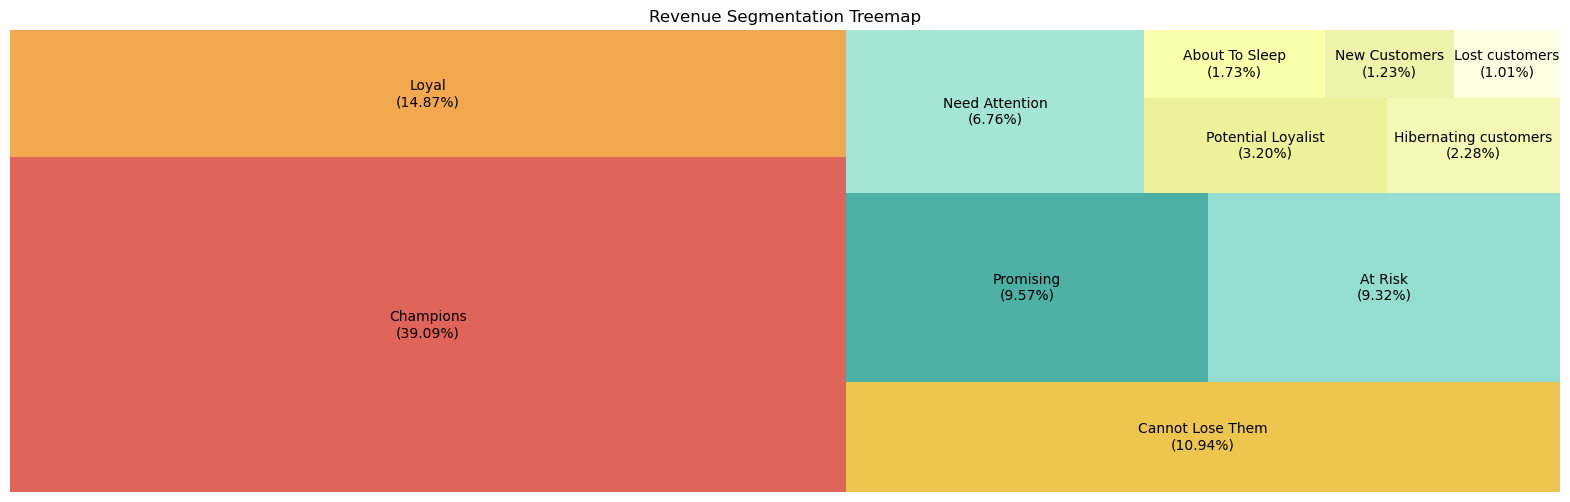

In [386]:
#visualization of %avg revenue for each segment, using tree map
grouped_seg = grouped_seg.sort_values(by='Avg transactions value', ascending=False)

#create a color palette
colors = ['#D83F31', '#EE9322', '#E9B824', '#219C90', '#78D6C6', '#8DDFCB', '#ECEE81', '#F2F7A1', '#F8FF95', '#EBEF95', '#FFFFDD']

#create a tree map
plt.figure(figsize=(20, 6))
squarify.plot(
    sizes=grouped_seg['%Revenue'],
    label=[f"{seg}\n({percentage:.2f}%)" for seg, percentage in zip(grouped_seg['Segment'], grouped_seg['%Revenue'])],
    color=colors,
    alpha=0.8)

plt.axis('off')
plt.title('Revenue Segmentation Treemap')
plt.show()